# Data Preprocessing

# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [0]:
# drive urls
uom_space_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/rm-category-type-py-compatible.xlsx'
em_location_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/2020-timetable-v2.xlsx'
floor_data_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/fl-name.xlsx'
meeting_room_usage_url = '/content/drive/My Drive/MAST90106-project-space-optimisation/project-data/meeting-room-usage.xlsx'

#loading data in respective data frames
uom_space_df = pd.read_excel(uom_space_url)
rm_category_type_df = pd.read_excel(rm_category_type_url)
em_location_df = pd.read_excel(em_location_url)
av_equipment_df = pd.read_excel(av_equipment_url)
timetable_2020_df = pd.read_excel(timetable_2020_url)
floor_df = pd.read_excel(floor_data_url)
meeting_room_usage_df = pd.read_excel(meeting_room_usage_url)

# Data Cleaning , pre-process and visualizations Functions

In [0]:


def clean_data(df):
  #convert all the string type values to lower case.
  for i in df.columns:
    if df[i].dtype == 'object':
      df[i] = df[i].fillna('_MISSING_')
      df[i] = df[i].astype('str').str.strip().str.lower()
    elif df[i].dtype == 'float64':
      df[i] = df[i].fillna(0.0)
      df[i] = df[i].astype('str').str.strip().astype('float')
    elif df[i].dtype == 'int64':
      df[i] = df[i].fillna(0)
      df[i] = df[i].astype('str').str.strip().astype('int')
  df = df.drop_duplicates(subset=None, keep="first", inplace=True)

def plot_data(dataframe):
    missing_data = dataframe.isnull().sum()
    df = pd.DataFrame({'Column Name':missing_data.index, 'Missing Data Count':missing_data.values})
    # sns.set(style="whitegrid", color_codes=True)
    # sns.barplot(x = 'Column Name', y = 'Missing Data Count', data=df)
    plt.figure(figsize=(9,4))
    ax = sns.barplot(x="Column Name", y='Missing Data Count', data=df);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.set(xlabel='Buildings', ylabel='Meeting Rooms Count')
    # plt.xticks(rotation = 40)
    plt.show()
#check percentage of missing data in uom space dataset
    for col in dataframe.columns:
        pct_missing = np.mean(dataframe[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

def split_data(df,col,delimeter,position,new_col):
    if new_col == 'no':
      for idx,row in df.iterrows():
        if delimeter in row[col]:
          code = row[col].split(delimeter)[position]
          df.at[idx,col] = code
    else:
      df[new_col]= df[col].apply(lambda x: str(x).split(delimeter)[int(position)] if str(x).find(delimeter)!=-1 else str(x) )

def delete_col(df,col):
  for i in range(len(col)):
    del df[col[i]]

def rename_drop_cols(df):
    cols_to_delete = []
    cols_to_rename_from = []
    cols_to_rename_to = []
    for i in df.columns:
        if '_y' in i:
            cols_to_delete.append(i)
        if '_x' in i:
            cols_to_rename_from.append(i)
            cols_to_rename_to.append(i.split('_x')[0])
    for i in range(len(cols_to_delete)):
        del df[cols_to_delete[i]]
    df.rename(columns=dict(zip(cols_to_rename_from, cols_to_rename_to)), inplace=True)


# Data visualize

Display datasets and the columns that need to be cleaned.

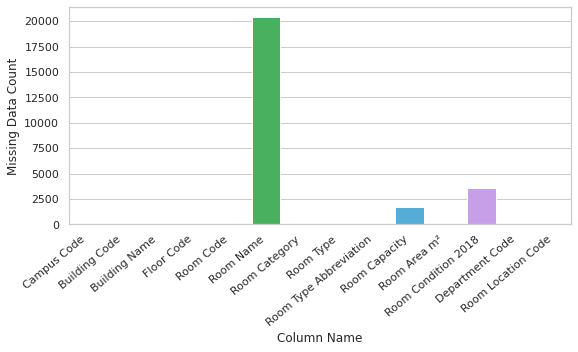

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 92.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 8.0%
Room Area m² - 0.0%
Room Condition 2018 - 16.0%
Department Code - 0.0%
Room Location Code - 0.0%


In [7]:
plot_data(uom_space_df)

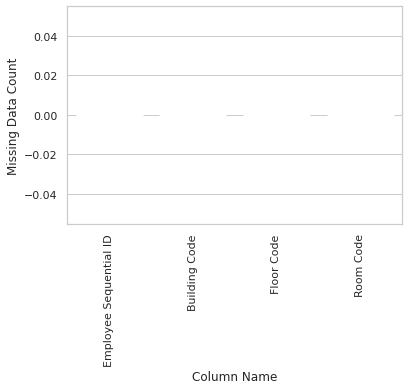

Employee Sequential ID - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%


In [0]:
plot_data(em_location_df)

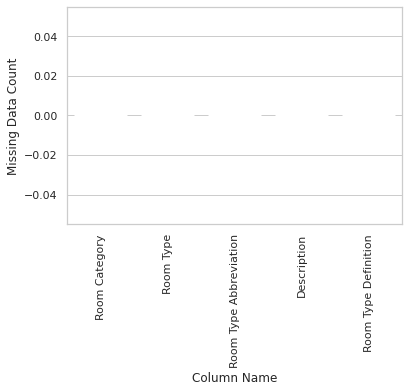

Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [0]:
plot_data(rm_category_type_df)

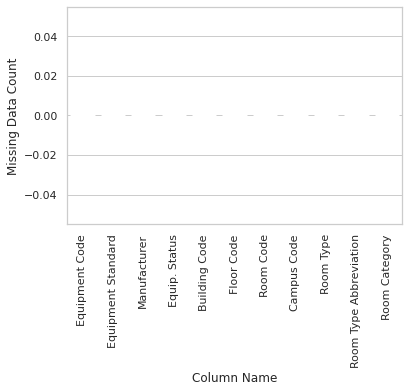

Equipment Code - 0.0%
Equipment Standard - 0.0%
Manufacturer - 0.0%
Equip. Status - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Campus Code - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Category - 0.0%


In [0]:
plot_data(av_equipment_df)

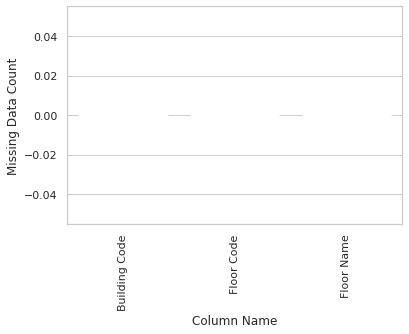

Building Code - 0.0%
Floor Code - 0.0%
Floor Name - 0.0%


In [0]:
plot_data(floor_df)

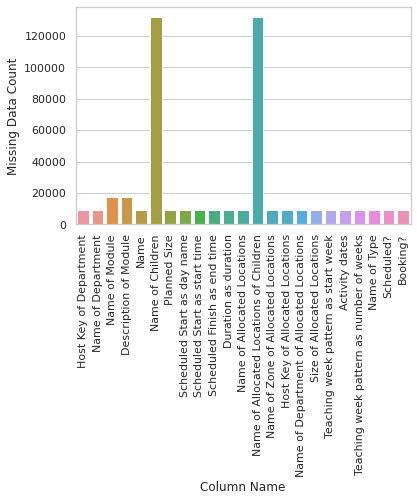

Host Key of Department - 7.0%
Name of Department - 7.0%
Name of Module - 13.0%
Description of Module - 13.0%
Name - 7.0%
Name of Children - 100.0%
Planned Size - 7.0%
Scheduled Start as day name - 7.0%
Scheduled Start as start time - 7.0%
Scheduled Finish as end time - 7.0%
Duration as duration - 7.0%
Name of Allocated Locations - 7.0%
Name of Allocated Locations of Children - 100.0%
Name of Zone of Allocated Locations - 7.0%
Host Key of Allocated Locations - 7.0%
Name of Department of Allocated Locations - 7.0%
Size of Allocated Locations - 7.0%
Teaching week pattern as start week - 7.0%
Activity dates - 7.0%
Teaching week pattern as number of weeks - 7.0%
Name of Type - 7.0%
Scheduled? - 7.0%
Booking? - 7.0%


In [0]:
plot_data(timetable_2020_df)

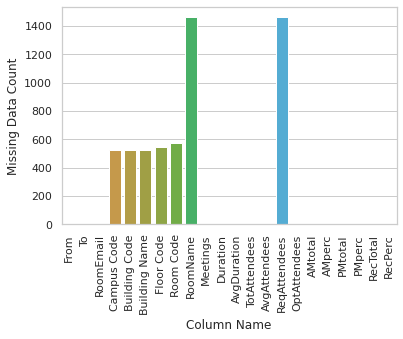

From - 0.0%
To - 0.0%
RoomEmail - 0.0%
Campus Code - 36.0%
Building Code - 36.0%
Building Name - 36.0%
Floor Code - 37.0%
Room Code - 39.0%
RoomName - 100.0%
Meetings - 0.0%
Duration - 0.0%
AvgDuration - 0.0%
TotAttendees - 0.0%
AvgAttendees - 0.0%
ReqAttendees - 100.0%
OptAttendees - 0.0%
AMtotal - 0.0%
AMperc - 0.0%
PMtotal - 0.0%
PMperc - 0.0%
RecTotal - 0.0%
RecPerc - 0.0%


In [0]:
plot_data(meeting_room_usage_df)

# Display Headers of Data(To understand briefly about the data to be cleaned)

In [0]:
uom_space_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code
0,PAR,101,BEAUREPAIRE CENTRE,0,CG01,NaN,6,631,Circ-Department,0.0,80.62,NaN,8490,PAR;101;0;CG01
1,PAR,101,BEAUREPAIRE CENTRE,0,CG02,NaN,8,805,Circulation,0.0,12.00,NaN,UNIGEN,PAR;101;0;CG02
2,PAR,101,BEAUREPAIRE CENTRE,0,CG03,NaN,6,631,Circ-Department,0.0,14.12,NaN,8490,PAR;101;0;CG03
3,PAR,101,BEAUREPAIRE CENTRE,0,CG04,NaN,8,805,Circulation,0.0,11.01,NaN,UNIGEN,PAR;101;0;CG04
4,PAR,101,BEAUREPAIRE CENTRE,0,G02,NaN,6,623,Waiting/Foyer,0.0,57.35,NaN,8490,PAR;101;0;G02


In [0]:
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,Office - Other,Office - Other ...,"To be used, as the last resort, for any ""Offic..."
1,1,101,Office Academic,Office - Academic Staff ...,A room with office furniture which provides ac...
2,1,102,Office Research,Office - Research Staff ...,A room with office furniture which provides ac...
3,1,103,Office Grad Res,Office - Graduate Researcher ...,A room with office furniture which provides ac...
4,1,104,Off-Tech,Office - Technical/Laboratory/Store Staff ...,A room with office furniture which provides ac...


In [0]:
em_location_df.head()

,Employee Sequential ID,Building Code,Floor Code,Room Code
0,1,102,4.0,438.01
1,2,102,0.0,G21.01
2,3,102,3.0,332.01
3,4,102,3.0,333.03
4,5,102,0.1,B08F


In [0]:
av_equipment_df.head()

,Equipment Code,Equipment Standard,Manufacturer,Equip. Status,Building Code,Floor Code,Room Code,Campus Code,Room Type,Room Type Abbreviation,Room Category
0,B122-R2-A18,MIC WL HANDHELD,Sennheiser,In service,379,0.1,B131,PAR,217,Collaborative,2
1,B122-R2-A20,WL PRES SYSTEM,Extron,In service,379,0.1,B131,PAR,217,Collaborative,2
2,B122-R2-B07,CONTROL SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
3,B122-R2-B08,WL PRES SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
4,B122-R2-E22,WL PRES SYSTEM,Extron,In service,379,0.1,B116,PAR,308,Stud Comp-Teach,3


In [0]:
floor_df.head()

,Building Code,Floor Code,Floor Name
0,101,0,Ground
1,101,0.1,Basement 1
2,101,1,Level 1
3,101,1.5,Level 1 Mezzanine
4,101,R,Roof


In [0]:
timetable_2020_df.head()

,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Name of Children,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Allocated Locations of Children,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type,Scheduled?,Booking?
0,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-06,12.0,Seminar,t,N
1,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-13,12.0,Seminar,t,N
2,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-20,12.0,Seminar,t,N
3,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-27,12.0,Seminar,t,N
4,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-04-03,12.0,Seminar,t,N


In [0]:
meeting_room_usage_df.head()

,From,To,RoomEmail,Campus Code,Building Code,Building Name,Floor Code,Room Code,RoomName,Meetings,Duration,AvgDuration,TotAttendees,AvgAttendees,ReqAttendees,OptAttendees,AMtotal,AMperc,PMtotal,PMperc,RecTotal,RecPerc
0,2019-01-09,2020-01-04,113-1-136-Room@unimelb.edu.au,PAR,113,BALDWIN SPENCER BUILDING,1.0,136,NaN,422,32010.0,76,1250,3,NaN,114,171,41,251,59,201,48
1,2019-01-09,2020-01-04,113-2-205-Room@unimelb.edu.au,PAR,113,BALDWIN SPENCER BUILDING,2.0,205,NaN,213,18600.0,87,586,3,NaN,77,89,42,124,58,36,17
2,2019-01-09,2020-01-04,133ABPKitchen@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,0.1,B108,NaN,1,90.0,90,2,2,NaN,1,0,0,1,100,0,0
3,2019-01-09,2020-01-04,133ABPL1DeansConf@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,1.0,102,NaN,547,49010.0,90,1872,3,NaN,42,261,48,286,52,74,14
4,2019-01-09,2020-01-04,133ABPL1DeansMR109@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,1.0,109,NaN,477,23915.0,50,1033,2,NaN,24,207,43,270,57,101,21


# Cleaning dataframes and pre-processing on dataframes

Delete columns which are not required

In [0]:
delete_col(timetable_2020_df,['Name of Children','Name of Allocated Locations of Children','Scheduled?','Booking?'])

In [0]:
clean_data(uom_space_df)
clean_data(em_location_df)
clean_data(rm_category_type_df)
clean_data(av_equipment_df)
clean_data(floor_df)
clean_data(timetable_2020_df)
clean_data(meeting_room_usage_df)

In [0]:
timetable_2020_df = timetable_2020_df[timetable_2020_df['Host Key of Allocated Locations'] != '_missing_'] 
timetable_2020_df = timetable_2020_df[timetable_2020_df['Host Key of Allocated Locations'] != 'online option.' ]
timetable_2020_df = timetable_2020_df[timetable_2020_df['Name of Zone of Allocated Locations'] != 'off-site'] 
timetable_2020_df.shape

(119419, 19)

Pre-process columns(create or convert existing columns.)

In [0]:
split_data(em_location_df,'Room Code','.',0,'no')
split_data(timetable_2020_df,'Host Key of Allocated Locations','-',0,'Building Code')
split_data(timetable_2020_df,'Host Key of Allocated Locations','-',1,'Room Code')
split_data(timetable_2020_df,'Name of Allocated Locations','-',0,'Campus Code')
timetable_2020_df['Campus Code'] = timetable_2020_df['Campus Code'].replace('zzzpar','par')

Converting data type of the column data and processing columns for merge

In [0]:
uom_space_df['Room Type'] = uom_space_df['Room Type'].astype(str).str.strip()
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(int)
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(str).str.strip()
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(int)
av_equipment_df['Floor Code'] = av_equipment_df['Floor Code'].astype(str).str.strip()
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(str).str.strip()



# Merging Datasets

Merge uom space data with room data, floor dataset

In [0]:
uom_rm_df = pd.merge(uom_space_df,rm_category_type_df,on = ['Room Type','Room Category'])
enhanced_uom_rm_df = pd.merge(uom_rm_df,floor_df, on = ['Building Code','Floor Code'])
enhanced_uom_rm_df.shape

(22166, 18)

Merge employee dataset with enhanced space data set

In [0]:
em_enhanced_df  = pd.merge(em_location_df,enhanced_uom_rm_df, on = ['Building Code','Floor Code','Room Code'])
em_enhanced_df.shape

(6962, 19)

merging meeting room usage with uom and room data set set

In [0]:
meeting_enhanced_uom_df = pd.merge(meeting_room_usage_df,enhanced_uom_rm_df, on=['Campus Code','Building Code','Floor Code','Room Code'])
meeting_enhanced_uom_df.shape

(728, 36)

Merge student dataset and uom and room datasets

In [0]:
timetable_uom_df = pd.merge(timetable_2020_df,enhanced_uom_rm_df, on = ['Building Code','Campus Code','Room Code'])
timetable_uom_df.shape


(116981, 37)

Merge equipment and uom data

In [0]:
merged_av_equipment_df = pd.merge(av_equipment_df,enhanced_uom_rm_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
merged_av_equipment_df.shape

(140, 25)

On closer observation, there are duplicate columns in the merged data set that needs to be renamed or dropped. Below section removes duplicate columns and rename any deformed column name

In [0]:
rename_drop_cols(enhanced_uom_rm_df)
rename_drop_cols(em_enhanced_df)
rename_drop_cols(meeting_enhanced_uom_df)
rename_drop_cols(timetable_uom_df)
rename_drop_cols(merged_av_equipment_df)

Cleaned data sets

In [0]:
print(enhanced_uom_rm_df.shape)
print(em_enhanced_df.shape)
print(meeting_enhanced_uom_df.shape)
print(timetable_uom_df.shape)
print(merged_av_equipment_df.shape)


(22166, 17)
(6962, 18)
(728, 34)
(116981, 36)
(140, 22)


# display grouped data


In [0]:
enhanced_uom_rm_df.head()


,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Description,Room Type Definition,Floor Name
0,par,101,beaurepaire centre,0,cg01,_missing_,6,631,circ-department,0.0,80.62,_missing_,8490,par;101;0;cg01,circulation - department,a corridor allocated to a specific faculty tha...,ground
1,par,101,beaurepaire centre,0,cg03,_missing_,6,631,circ-department,0.0,14.12,_missing_,8490,par;101;0;cg03,circulation - department,a corridor allocated to a specific faculty tha...,ground
2,par,101,beaurepaire centre,0,cg02,_missing_,8,805,circulation,0.0,12.00,_missing_,unigen,par;101;0;cg02,circulation space,"a foyer or corridor, stair or other area for t...",ground
3,par,101,beaurepaire centre,0,cg04,_missing_,8,805,circulation,0.0,11.01,_missing_,unigen,par;101;0;cg04,circulation space,"a foyer or corridor, stair or other area for t...",ground
4,par,101,beaurepaire centre,0,g02,_missing_,6,623,waiting/foyer,0.0,57.35,_missing_,8490,par;101;0;g02,waiting area/foyer,an area adjacent to office space that is used...,ground


In [0]:
meeting_enhanced_uom_df.head()

,From,To,RoomEmail,Campus Code,Building Code,Building Name,Floor Code,Room Code,RoomName,Meetings,Duration,AvgDuration,TotAttendees,AvgAttendees,ReqAttendees,OptAttendees,AMtotal,AMperc,PMtotal,PMperc,RecTotal,RecPerc,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code,Description,Room Type Definition,Floor Name
0,2019-01-09,2020-01-04,113-2-205-room@unimelb.edu.au,par,113,baldwin spencer building,2,205,0.0,213,18600.0,87,586,3,0.0,77,89,42,124,58,36,17,_missing_,6,601,conf / meeting,10.0,21.39,good,2200,par;113;2;205,meeting/board/conference room,a room specifically set aside for holding meet...,level 2
1,2019-01-09,2020-01-04,133abpl1deansconf@unimelb.edu.au,par,133,glyn davis building,1,102,0.0,547,49010.0,90,1872,3,0.0,42,261,48,286,52,74,14,dean's conference room,6,601,conf / meeting,16.0,42.05,excellent,7020,par;133;1;102,meeting/board/conference room,a room specifically set aside for holding meet...,level 1
2,2019-01-09,2020-01-04,133abpl1deansmr109@unimelb.edu.au,par,133,glyn davis building,1,109,0.0,477,23915.0,50,1033,2,0.0,24,207,43,270,57,101,21,meeting room,6,601,conf / meeting,6.0,10.52,excellent,7020,par;133;1;109,meeting/board/conference room,a room specifically set aside for holding meet...,level 1
3,2019-01-09,2020-01-04,133abpl1deansmr112@unimelb.edu.au,par,133,glyn davis building,1,112,0.0,196,8455.0,43,444,2,0.0,10,73,37,123,63,23,12,meeting room,6,601,conf / meeting,4.0,15.34,excellent,7020,par;133;1;112,meeting/board/conference room,a room specifically set aside for holding meet...,level 1
4,2019-01-09,2020-01-04,133abpl2mr201@unimelb.edu.au,par,133,glyn davis building,2,201,0.0,784,61635.0,79,3220,4,0.0,151,293,37,491,63,108,14,_missing_,6,601,conf / meeting,10.0,26.27,_missing_,7020,par;133;2;201,meeting/board/conference room,a room specifically set aside for holding meet...,level 2


In [0]:
meeting_enhanced_uom_df.head()
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]
toilet_types = possible_rooms['Room Type Definition'].tolist()

In [0]:
merged_space_data_df_PAR = enhanced_uom_rm_df[enhanced_uom_rm_df['Campus Code']=='par']
merged_em_location_df_PAR = em_enhanced_df[em_enhanced_df['Campus Code']=='par']
merged_av_equipment_df_PAR = merged_av_equipment_df[merged_av_equipment_df['Campus Code']=='par']
merged_meeting_room_usage_df_PAR = meeting_enhanced_uom_df[meeting_enhanced_uom_df['Campus Code']=='par']
merged_timetable_df_PAR = timetable_uom_df[timetable_uom_df['Campus Code']=='par']

In [0]:
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type Definition'].str.contains("toilet|washroom")]
toilet_room_types = possible_rooms['Room Type'].tolist()

possible_toilets_df = merged_space_data_df_PAR[merged_space_data_df_PAR['Room Type'].isin(toilet_room_types)]


possible_rooms = rm_category_type_df[rm_category_type_df['Room Type'].str.contains("601|629")]
meeting_room_types = possible_rooms['Room Type'].tolist()

# supply of meeting rooms
possible_meeting_rooms_df = merged_space_data_df_PAR[merged_space_data_df_PAR['Room Type'].isin(meeting_room_types)]
possible_meeting_rooms_df.shape

(692, 17)

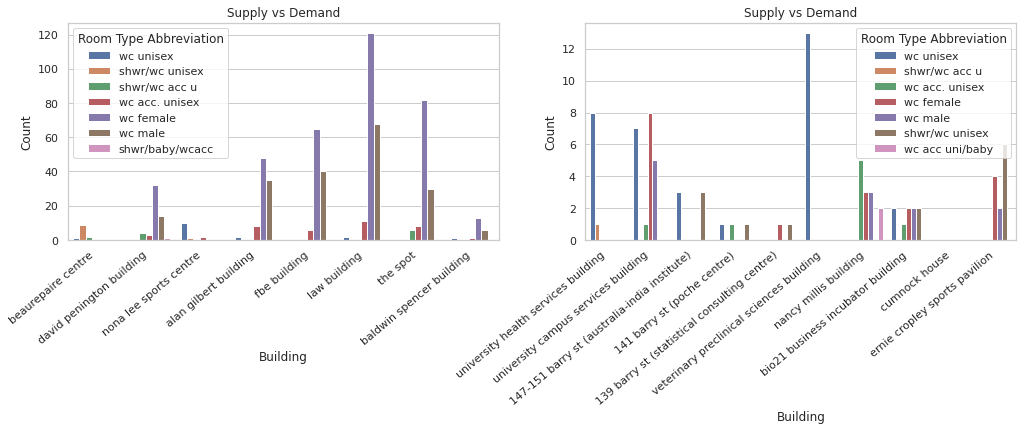

In [0]:
gdf1 = possible_toilets_df.groupby(by=['Building Code','Building Name','Room Type','Room Type Abbreviation'], as_index=False).agg({'Room Code':pd.Series.nunique,'Room Capacity':'sum'})
gdf1.sort_values(by=['Building Name','Room Type','Room Capacity'], inplace=False)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Room Capacity', hue='Room Type Abbreviation', dodge=True, data=gdf1.head(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Building', ylabel='Count')
ax1.set_title("Supply vs Demand")

ax2 = sns.barplot(x="Building Name", y='Room Capacity', hue='Room Type Abbreviation', dodge=True, data=gdf1.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Building', ylabel='Count')
ax2.set_title("Supply vs Demand")

plt.show()

In [0]:
possible_meeting_rooms_df_f1 = merged_meeting_room_usage_df_PAR[merged_meeting_room_usage_df_PAR['Room Condition 2018'] == 'excellent'] 
gdf1 = possible_meeting_rooms_df_f1.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = possible_meeting_rooms_df_f1.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Meetings':sum,'AvgAttendees':sum,'Room Capacity':sum})
gdf2.sort_values(by=['Meetings','AvgAttendees','Room Capacity'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_att = gdf2['AvgAttendees'].sum()
gdf2['AvgAttendees'] = (gdf2['AvgAttendees']/total_att)


# total_att2 = gdf2['Room Area m²'].sum()
# gdf2['Room Area m²'] = gdf2['Room Area m²']/total_att2

total_att1 = gdf2['Room Capacity'].sum()
gdf2['Room Capacity'] = gdf2['Room Capacity']/total_att1


total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

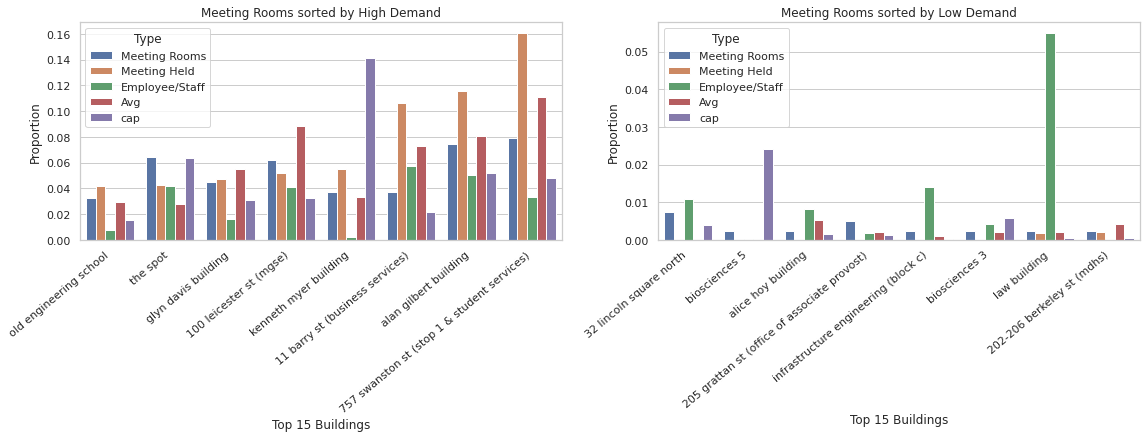

In [0]:
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Avg')
    d['Value'].append(row['AvgAttendees'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('cap')
    d['Value'].append(row['Room Capacity'])


    
   
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()


In [0]:
possible_meeting_rooms_df_f1 = merged_meeting_room_usage_df_PAR[merged_meeting_room_usage_df_PAR['Room Condition 2018'] == 'good'] 
gdf1 = possible_meeting_rooms_df_f1.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = possible_meeting_rooms_df_f1.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Meetings':sum,'AvgAttendees':sum,'Room Capacity':sum})
gdf2.sort_values(by=['Meetings','AvgAttendees','Room Capacity'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_att = gdf2['AvgAttendees'].sum()
gdf2['AvgAttendees'] = (gdf2['AvgAttendees']/total_att)


# total_att2 = gdf2['Room Area m²'].sum()
# gdf2['Room Area m²'] = gdf2['Room Area m²']/total_att2

total_att1 = gdf2['Room Capacity'].sum()
gdf2['Room Capacity'] = gdf2['Room Capacity']/total_att1


total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

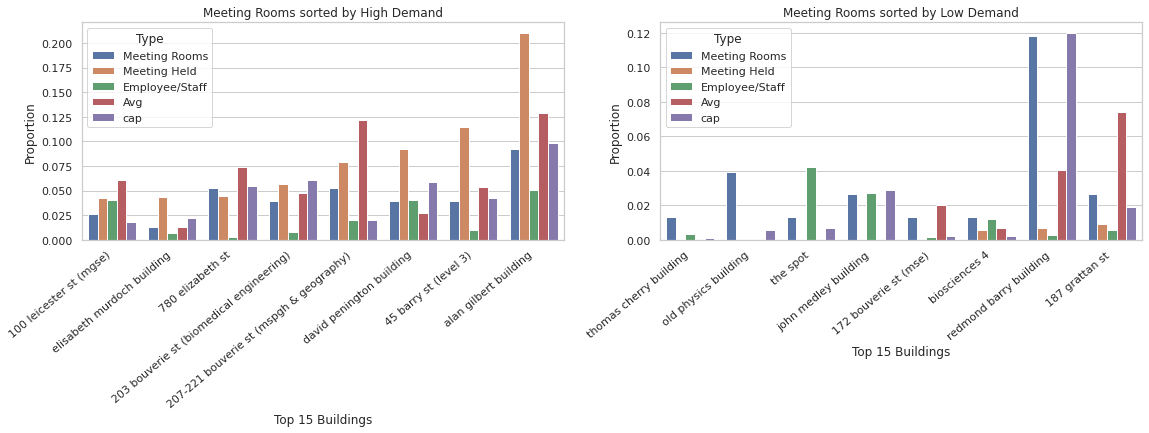

In [0]:
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Avg')
    d['Value'].append(row['AvgAttendees'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('cap')
    d['Value'].append(row['Room Capacity'])


    
   
df = pd.DataFrame(data=d)
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()


In [0]:
meeting_room_usage_data_new = pd.merge(merged_meeting_room_usage_df_PAR,possible_meeting_rooms_df,on=['Building Code','Floor Code','Room Code'])
rename_drop_cols(meeting_room_usage_data_new)
meeting_room_usage_data_new.shape

(373, 34)

In [0]:
gdf1 = meeting_room_usage_data_new.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique,'AvgAttendees':sum,'AMtotal':sum,'PMtotal':sum})
gdf1.sort_values(by=['Room Code','AMtotal', 'PMtotal','AvgAttendees'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Department Code'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_am = gdf1['AMtotal'].sum()
gdf1['AMtotal'] = gdf1['AMtotal']/total_am

total_att = gdf1['AvgAttendees'].sum()
gdf1['AvgAttendees'] = gdf1['AvgAttendees']/total_att

total_pm = gdf1['PMtotal'].sum()
gdf1['PMtotal'] = gdf1['PMtotal']/total_pm

# total_meetings = gdf1['Meetings'].sum()
# gdf1['Meetings'] = gdf1['Meetings']/total_meetings

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp


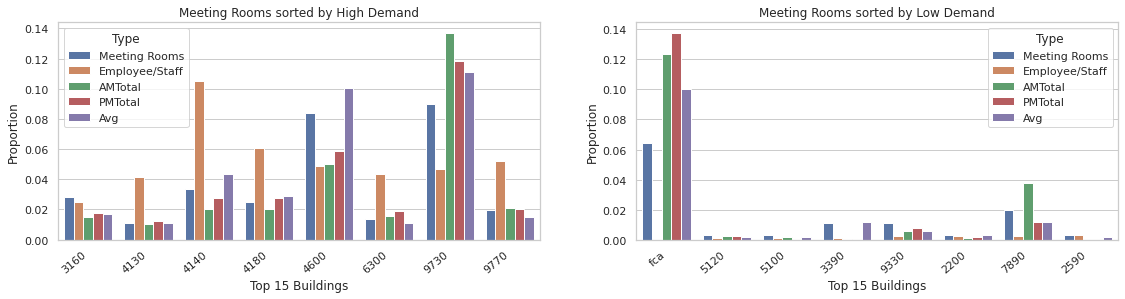

In [0]:
gd = pd.merge(gdf2, gdf1, on=['Department Code'])
d = {
    'Department Code':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('AMTotal')
    d['Value'].append(row['AMtotal'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('PMTotal')
    d['Value'].append(row['PMtotal'])
    # d['Department Code'].append(row['Department Code'])
    # d['Type'].append('Meetings Held')
    # d['Value'].append(row['Meetings'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Avg')
    d['Value'].append(row['AvgAttendees'])

df= pd.DataFrame(data = d)



fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()


In [0]:
gdf1 = meeting_room_usage_data_new.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique,'AvgAttendees':sum})
gdf1.sort_values(by=['Room Code','AvgAttendees'], inplace=True)

gdf2 = meeting_room_usage_data_new.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique,'AMtotal':sum,'PMtotal':sum})
gdf2.sort_values(by=['Room Code','AMtotal','PMtotal'], inplace=True)

gdf3 = meeting_room_usage_data_new.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique,'PMtotal':sum})
gdf3.sort_values(by=['Room Code','PMtotal'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_att = gdf1['AvgAttendees'].sum()
gdf1['AvgAttendees'] = gdf1['AvgAttendees']/total_att

total_rooms3 = gdf2['AMtotal'].sum()
gdf2['AMtotal'] = gdf2['AMtotal']/total_rooms3

total_rooms5 = gdf2['PMtotal'].sum()
gdf2['PMtotal'] = gdf2['PMtotal']/total_rooms5

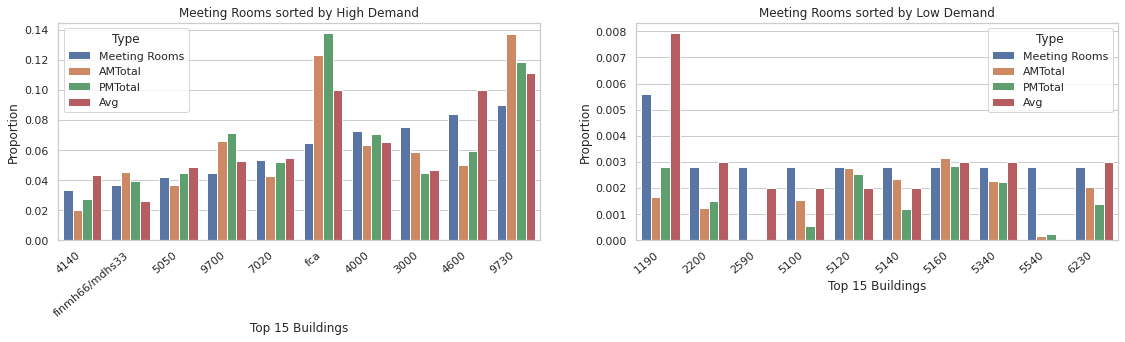

In [0]:


gd = pd.merge(gdf2,gdf1,on=['Department Code'])
del gd['Room Code_x']
gd['Room Code'] = gd['Room Code_y']
del gd['Room Code_y']

gd.head()

d = {
    'Department Code':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('AMTotal')
    d['Value'].append(row['AMtotal'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('PMTotal')
    d['Value'].append(row['PMtotal'])
    # d['Department Code'].append(row['Department Code'])
    # d['Type'].append('Meetings Held')
    # d['Value'].append(row['Meetings'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Avg')
    d['Value'].append(row['AvgAttendees'])

df= pd.DataFrame(data = d)



fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()
